# Logistic Regression
Abby Irish
CS74 Winter 2025

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [229]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [95]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

Let's try your implementation of the sigmoid function on the following values to make sure it is working fine:

1. x = -1.5
2. x = 0
3. x = 2.5

In [96]:
print('sigmoid(-1.5) = ', sigmoid(-1.5))
print('sigmoid(0) = ', sigmoid(0))
print('sigmoid(2.5) = ', sigmoid(2.5))

sigmoid(-1.5) =  0.18242552380635635
sigmoid(0) =  0.5
sigmoid(2.5) =  0.9241418199787566


Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [138]:
#Your linear model from HW2
# linear regression model takes in array of data points, x, and array of weights, w.
def model(x,w): 
    y_predicted =  w[0] + w[1] * x   # y_predicted = linear combination for each data point, assuming each data point in x has only 1 feature
    return y_predicted  

#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    P = len(y)
    predictions = sigmoid(model(x, w))
    cost = -np.mean(y*np.log(predictions) + (1-y)*(np.log(1-predictions)))
    return cost

Run the code below to read a data file and plot a scatter plot of x vs y.

Text(0, 0.5, 'y')

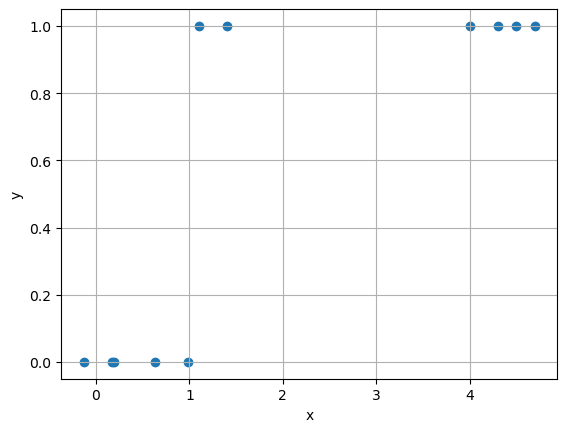

In [154]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

plt.scatter(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

Q3) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=1500,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [155]:
# gradient descent function from HW2
def gradient_descent(g, alpha, max_its, w, x, y):
    gradient = grad(g)   # use the autograd library to find the gradient of a function
    
    weight_history = [w] # list to store weights
    cost_history  = [g(w, x, y)] # list to store costs

    for k in range(max_its):
        grad_w = gradient(w, x, y) # compute gradient

        w = w - alpha * grad_w

        cost = g(w, x, y) # compute cost
        
        # Store history
        weight_history.append(w)
        cost_history.append(cost)
        
    return weight_history,cost_history

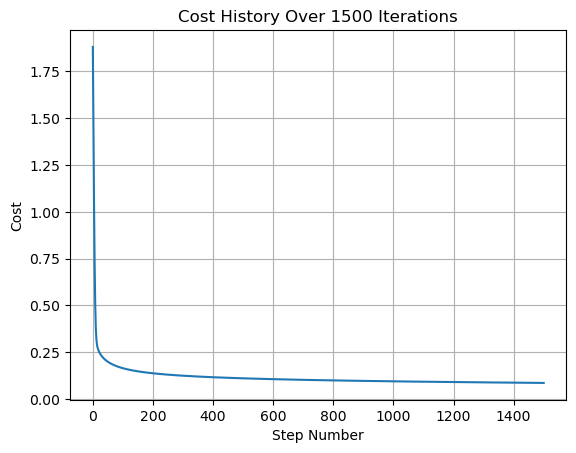

In [156]:
# Call the gradient_descent function
weight_hist, cost_hist = gradient_descent(cross_entropy, 1, 1500, np.array([3.0,3.0]), x, y)

# Plot the cost history
plt.plot(range(len(cost_hist)), cost_hist)
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost History Over 1500 Iterations")
plt.grid()
plt.show()

Q4) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [157]:
def logistic_regression(learned_w,x):
    positive_class_prob = sigmoid(model(x, learned_w))
    return positive_class_prob

Q5) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from before.


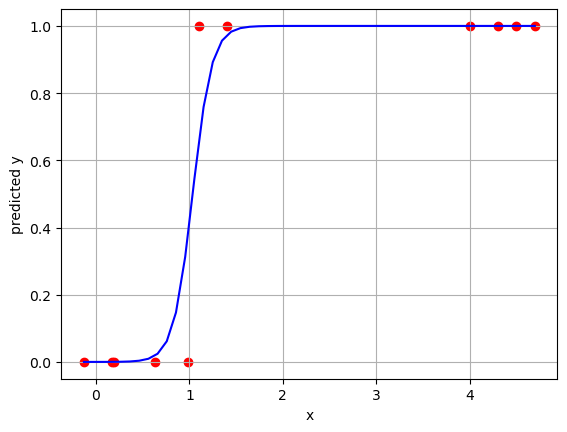

In [158]:
s = np.linspace(np.min(x),np.max(x))
learned_weights = weight_hist[-1]
ys = logistic_regression(learned_weights, s)

plt.scatter(x, y, color='red')
plt.plot(s, ys, color='blue')
plt.xlabel("x")
plt.ylabel("predicted y")
plt.grid()
plt.show()

Q6) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [144]:
def logistic_regression_modified(learned_w, x, threshold):
    pred = logistic_regression(learned_w, x)
    class_label = (pred > threshold).astype(int)
    return class_label

Q7) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [145]:
def evaluate(y_actual, y_pred):
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0

    for actual, pred in zip(y_actual[0], y_pred[0]): # loop through two lists simultaneously
        if pred == actual: # if the prediction equals actual, pred is true
            if actual == 1:
                true_positive += 1 # if actual is positive, true_positive
            else:
                true_negative += 1 # if actual is negative, true_negative
                
        elif actual == 1: # otherwise pred does not equal actual and is false
            false_negative += 1 # if actual is positive, false_negative
        elif actual == 0:
            false_positive += 1 # if actual is negaitve, false_positive

    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

    conf_matrix = np.array([[true_positive, false_negative], [false_positive, true_negative]])
    print("Confusion matrix:\n", conf_matrix)

    return false_positive, false_negative, true_positive, true_negative, accuracy

In [146]:
y_preds = logistic_regression_modified(learned_weights, x, 0.5)
false_positive, false_negative, true_positive, true_negative, accuracy = evaluate(y, y_preds)

print(f"{true_positive = }\n"
      f"{true_negative = }\n"
      f"{false_positive = }\n"
      f"{false_negative = }\n"
      f"{accuracy = }\n")

Confusion matrix:
 [[6 0]
 [0 5]]
true_positive = 6
true_negative = 5
false_positive = 0
false_negative = 0
accuracy = 1.0



Q8) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [159]:
def perceptron_cost(w,x,y):
   cost = np.mean(np.log(1 + np.exp(-y * model(x, w))))
   return cost

Q9) [10 points]
* Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=1500,w=[1.0,1.0], and alpha=1.0.
* Save the cost and weight history returned by the gradient descent function.
* Plot the cost history.
* Answer: Which cost seems to do better on this dataset? Why do think that is?


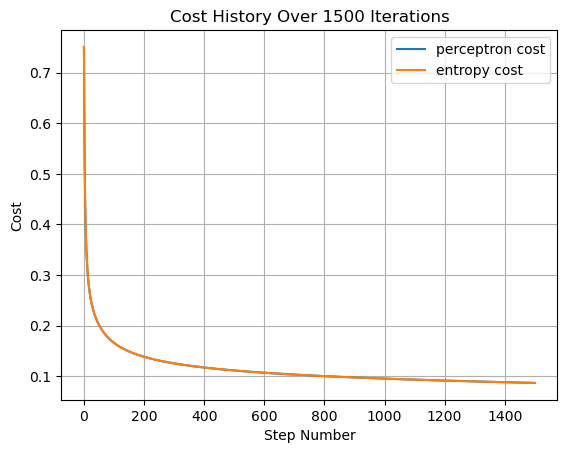

In [164]:
# adjust labels for perceptron cost to be -1 and 1 (not 0 and 1)
y_perc = y.copy()
y_perc[y_perc == 0] = -1

# Call the gradient_descent function for perceptron and for entropy cost functions
weight_hist_perceptron, cost_hist_perceptron = gradient_descent(perceptron_cost, 1, 1500, np.array([1.0, 1.0]), x, y_perc)
weight_hist_entropy, cost_hist_entropy = gradient_descent(cross_entropy, 1, 1500, np.array([1.0, 1.0]), x, y)

# Plot the cost history
plt.plot(range(len(cost_hist_perceptron)), cost_hist_perceptron, label="perceptron cost")
plt.plot(range(len(cost_hist_entropy)), cost_hist_entropy, label="entropy cost") # for entropy cost from above
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost History Over 1500 Iterations")
plt.legend()
plt.grid()
plt.show()

The two cost functions seem to have identical performance, likely because the tanh function for the perceptron cost function is just a shifted version of the sigmoid function for the entropy cost function.

Q10) [11 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns.

* Read the data file. (Note that the first line is the header describing each column.)
* Use the data above to set y to be the "target" and X to be the remaining columns.
* Split your data into 80% train 20% test using train_test_split.
* Use sklearn to fit a logistic regression model on your training set. Use all the default parameters. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [219]:
# read in data
df = pd.read_csv('heart.csv', delimiter=',')
df.head()

# set y to be "target" and x to be remaining columns
y = df["target"]
x = df.drop("target", axis=1)

# split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=10)

In [221]:
# fit a logistic regression model on training set
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Q11) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [226]:
# use predict_proba() function on X_test
pred_probs = log_model.predict_proba(X_test)
print(pred_probs)

[[0.95513188 0.04486812]
 [0.42679672 0.57320328]
 [0.68281376 0.31718624]
 [0.24752961 0.75247039]
 [0.930744   0.069256  ]
 [0.22438267 0.77561733]
 [0.22379249 0.77620751]
 [0.28227491 0.71772509]
 [0.12728282 0.87271718]
 [0.92357939 0.07642061]
 [0.03610083 0.96389917]
 [0.97405669 0.02594331]
 [0.27622049 0.72377951]
 [0.57899011 0.42100989]
 [0.93619888 0.06380112]
 [0.63759976 0.36240024]
 [0.98874162 0.01125838]
 [0.99285963 0.00714037]
 [0.08136316 0.91863684]
 [0.93148835 0.06851165]
 [0.97083326 0.02916674]
 [0.12913173 0.87086827]
 [0.36942687 0.63057313]
 [0.07344819 0.92655181]
 [0.94074463 0.05925537]
 [0.95718166 0.04281834]
 [0.99313398 0.00686602]
 [0.86532122 0.13467878]
 [0.03630567 0.96369433]
 [0.99386883 0.00613117]
 [0.11458102 0.88541898]
 [0.87989718 0.12010282]
 [0.96324371 0.03675629]
 [0.62051681 0.37948319]
 [0.99036947 0.00963053]
 [0.8688958  0.1311042 ]
 [0.28996338 0.71003662]
 [0.58032753 0.41967247]
 [0.14287495 0.85712505]
 [0.92557505 0.07442495]


Q12) [12 points]

Now you will report your results.

* Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. (I.e., you should no longer have tuples.)
* Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters).
* Print out the thresholds generated by the roc_curve function.
* Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score.

In [227]:
# filter predicted probabilities to an array containing only probabilities for class 1
pred_probs = pred_probs[:, 1]
print(pred_probs)

[0.04486812 0.57320328 0.31718624 0.75247039 0.069256   0.77561733
 0.77620751 0.71772509 0.87271718 0.07642061 0.96389917 0.02594331
 0.72377951 0.42100989 0.06380112 0.36240024 0.01125838 0.00714037
 0.91863684 0.06851165 0.02916674 0.87086827 0.63057313 0.92655181
 0.05925537 0.04281834 0.00686602 0.13467878 0.96369433 0.00613117
 0.88541898 0.12010282 0.03675629 0.37948319 0.00963053 0.1311042
 0.71003662 0.41967247 0.85712505 0.07442495 0.23754791 0.05672996
 0.71627249 0.60018761 0.97511963 0.5738576  0.81268689 0.88558097
 0.72597715 0.53101548 0.43837894 0.87463016 0.04857777 0.30209566
 0.98369266 0.6701489  0.68025334 0.80820957 0.01390403 0.05206871
 0.71327402]


thresholds = array([       inf, 0.98369266, 0.85712505, 0.81268689, 0.72597715,
       0.71772509, 0.71627249, 0.71327402, 0.71003662, 0.68025334,
       0.6701489 , 0.57320328, 0.53101548, 0.43837894, 0.42100989,
       0.41967247, 0.36240024, 0.1311042 , 0.12010282, 0.03675629,
       0.02916674, 0.00613117])


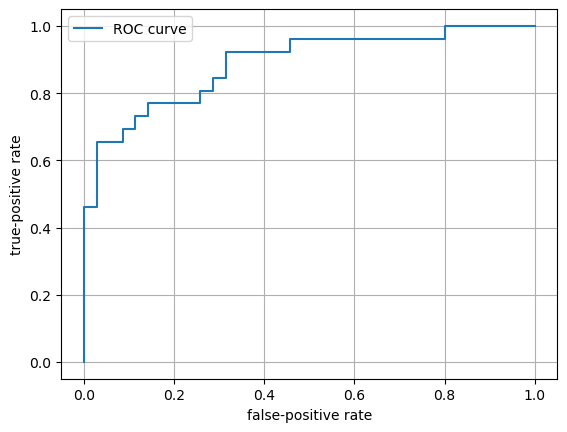

In [228]:
FPR, TPR, thresholds = roc_curve(y_test, pred_probs)

# thresholds generated by roc_curve
print(f"{thresholds = }")

# plot
plt.plot(FPR, TPR, label='ROC curve')
plt.xlabel('false-positive rate')
plt.ylabel('true-positive rate')
plt.grid()
plt.legend()
plt.show()

In [231]:
# use the roc_auc_score function to report AUC score
auc_score = roc_auc_score(y_test, pred_probs)
print("AUC score: ", auc_score)

AUC score:  0.8879120879120879
